In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import r2_score
%matplotlib inline



Using TensorFlow backend.


In [3]:
#Set working directory
os.chdir("/home/sharath/Data Science")
os.getcwd()

'/home/sharath/Data Science'

In [4]:
#Load the data
Employee_abs=pd.read_excel("Absenteeism_at_work_Project.xls")

# Exploratory Data Analysis


In [5]:
Employee_abs.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
Employee_abs.shape

(740, 21)

In [7]:
#Replacing spaces from columns name with underscore
Employee_abs.columns = Employee_abs.columns.str.replace(" ","_")
Employee_abs.columns = Employee_abs.columns.str.replace("/","_")

In [8]:
Employee_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason_for_absence                 737 non-null float64
Month_of_absence                   739 non-null float64
Day_of_the_week                    740 non-null int64
Seasons                            740 non-null int64
Transportation_expense             733 non-null float64
Distance_from_Residence_to_Work    737 non-null float64
Service_time                       737 non-null float64
Age                                737 non-null float64
Work_load_Average_day_             730 non-null float64
Hit_target                         734 non-null float64
Disciplinary_failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social_drinker                     737 non-null float64
Social_smoker                      736 non-null float64
Pet  

In [9]:
Employee_abs.describe()


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
Employee_abs.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average_day_             38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [11]:
#Droping ID column as it will not be of any help in our analysis
Employee_abs=Employee_abs.drop("ID",axis=1)

In [12]:
#as Month column can contain maximum 12 values so replacing 0 with NA
Employee_abs["Month_of_absence"]=Employee_abs["Month_of_absence"].replace(0,np.nan)

In [13]:
# Dividing Work_load_Average/day_ by 1000 (As said by the support team)
Employee_abs['Work_load_Average_day_'] = Employee_abs['Work_load_Average_day_']/1000

In [14]:
Employee_abs.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average_day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [15]:
cnames=['Transportation_expense','Distance_from_Residence_to_Work','Service_time','Age','Work_load_Average_day_', 
        'Hit_target','Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours']
cat_cnames= ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
             'Disciplinary_failure', 'Education', 'Son', 'Social_drinker','Social_smoker', 'Pet']

# Data Pre Processing 
# Missing value Analysis:-


In [16]:
#Missing values in each variable-
Employee_abs.isnull().sum()

Reason_for_absence                  3
Month_of_absence                    4
Day_of_the_week                     0
Seasons                             0
Transportation_expense              7
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 3
Work_load_Average_day_             10
Hit_target                          6
Disciplinary_failure                6
Education                          10
Son                                 6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body_mass_index                    31
Absenteeism_time_in_hours          22
dtype: int64

In [17]:
# Droping observation in which "Absenteeism time in hours" has missing value-
Employee_abs= Employee_abs.drop(Employee_abs[Employee_abs['Absenteeism_time_in_hours'].isnull()].index, axis=0)
print(Employee_abs.shape)


(718, 20)


In [18]:
##Missing value analysis-

#Creat dataframe with missing value present in each variable-

missing_value= pd.DataFrame(Employee_abs.isnull().sum()).reset_index()

#Rename variable-
missing_value= missing_value.rename(columns={'index':'variable',0:'missing_precentage'})

#Missing value precentage-
missing_value['missing_precentage']= (missing_value['missing_precentage']/len(Employee_abs))*100

#Sorting missing value-
missing_value= missing_value.sort_values('missing_precentage',ascending=False).reset_index(drop=True)

#Write missing data into drive-
missing_value.to_csv("missing_value.csv",index=False)

In [19]:
missing_value

,variable,missing_precentage
0,Body_mass_index,4.038997
1,Height,1.949861
2,Education,1.392758
3,Work_load_Average_day_,1.114206
4,Transportation_expense,0.835655
5,Son,0.835655
6,Hit_target,0.835655
7,Disciplinary_failure,0.696379
8,Social_smoker,0.557103
9,Month_of_absence,0.557103


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

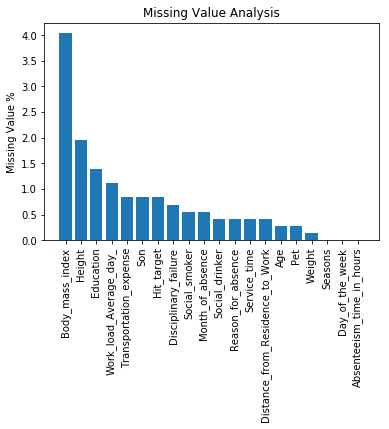

In [20]:
#Missing value analysis by visualization-
plt.bar(missing_value['variable'],missing_value['missing_precentage'])
plt.ylabel('Missing Value %')
plt.title('Missing Value Analysis')
plt.savefig('missing_value.pdf')
plt.xticks(rotation=90)

In [21]:
#Missing value imputation for categorical varibles-
for i in cat_cnames:
    print(i)
    Employee_abs[i] = Employee_abs[i].fillna(Employee_abs[i].mode()[0])
    print(Employee_abs[i])


Reason_for_absence
0      26.0
1       0.0
2      23.0
3       7.0
4      23.0
6      22.0
7      23.0
8      19.0
9      22.0
10      1.0
11      1.0
12     11.0
13     11.0
14     23.0
16     23.0
17     21.0
18     11.0
19     23.0
21     11.0
22     13.0
23     28.0
24     18.0
25     25.0
26     23.0
27     28.0
28     18.0
29     23.0
30     18.0
31     18.0
32     23.0
       ... 
710    22.0
711    19.0
712    19.0
713    27.0
714     0.0
715     0.0
716    19.0
717    13.0
718    28.0
719    13.0
720    25.0
721    22.0
722     8.0
723    10.0
724    22.0
725    26.0
726    19.0
727     6.0
728    28.0
729     6.0
730    22.0
731    23.0
732    22.0
733    22.0
734    13.0
735    14.0
736    11.0
737     0.0
738     0.0
739     0.0
Name: Reason_for_absence, Length: 718, dtype: float64
Month_of_absence
0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
6      7.0
7      7.0
8      7.0
9      7.0
10     7.0
11     7.0
12     7.0
13     7.0
14     7.0
16     7.0
17     7.0
18

In [25]:
df3=Employee_abs.copy()
#Employee_abs=df3.copy()

In [26]:
##Missing value imputation for numeric variables-
#Here we have two methods to check which method is suitable for imputing missing values 
#one is taking sample data and manually creating missing values and checking which method is suitable
#and another method is checking standard Deviation for variables and selecting accurate method 

#Lets take one sample data for referance-
#Employee_abs['Body_mass_index'][13]
#Actual Value= 31
#Mean= 26.70
#Median=25
#KNN= 31

#Replace sample data with NA for check the accuracy of imputation method.
#Employee_abs['Body_mass_index'][13]=np.nan  

##Standard Deviation method
np.std(Employee_abs["Body_mass_index"])
#actual std=4.28
#Mean method=4.20
#median method=4.21
#Knn method=4.27

4.287690880887575

In [24]:
#Imputation with mean method
Employee_abs['Body_mass_index']= Employee_abs['Body_mass_index'].fillna(Employee_abs['Body_mass_index'].mean())

Employee_abs['Body_mass_index'][13]
#Mean = 26.703488372093023

In [28]:
#reload the data and then do the median method
#Imputation with mode method
#Mean  method-
Employee_abs['Body_mass_index']= Employee_abs['Body_mass_index'].fillna(Employee_abs['Body_mass_index'].median())

Employee_abs['Body_mass_index'][13]
#Mean = 25

In [29]:
#reload the data
#KNN method-
Employee_abs= pd.DataFrame(KNN(k=3).fit_transform(Employee_abs),columns=Employee_abs.columns)

#Employee_abs['Body_mass_index'][13]
#KNN=31.00
np.std(Employee_abs["Body_mass_index"])


4.2755195283308005

In [30]:
#KNN imputation is more accurate than other imputation methods 
#so we selected KNN method for imputing the numeric variables

#now Checking if all the missing values imputed
Employee_abs.isnull().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

## Data Understanding 

Text(0.5, 1.0, 'Abseenteeism time in hours Statistics')

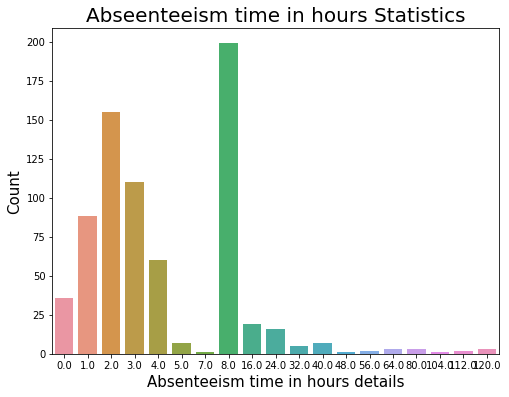

In [31]:
#Target Variable data distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Absenteeism_time_in_hours', data=Employee_abs)
plt.xlabel('Absenteeism time in hours details', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.savefig("Absenteeism_time_in_hours.png")
plt.title("Abseenteeism time in hours Statistics",fontsize= 20)



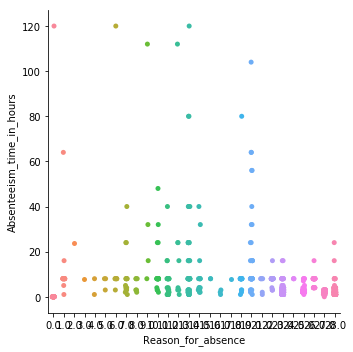

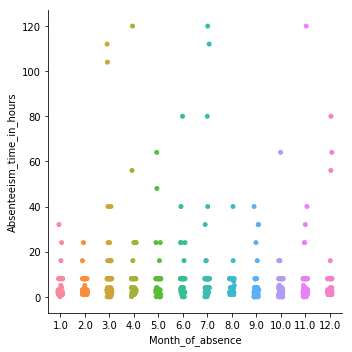

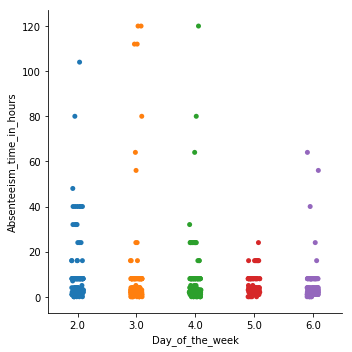

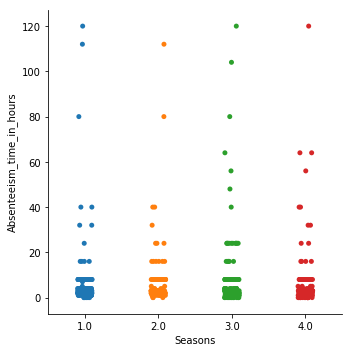

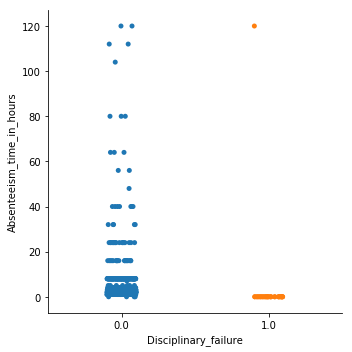

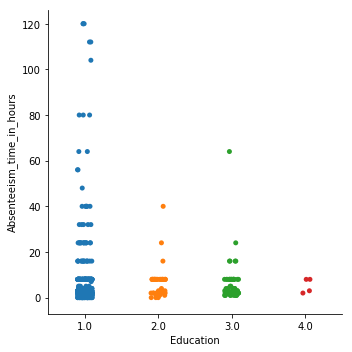

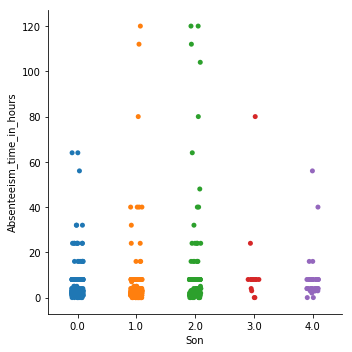

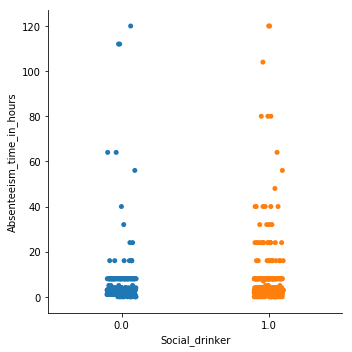

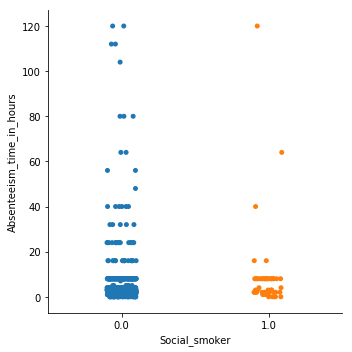

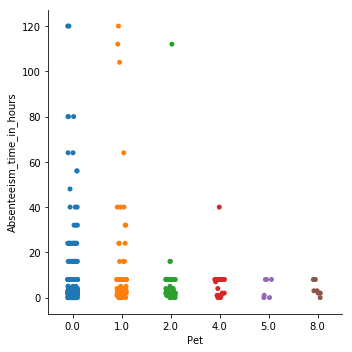

In [32]:
#Visualizing categorical variables with Target variable
for i in cat_cnames:
    sns.catplot(x=i, y="Absenteeism_time_in_hours", data=Employee_abs)
    fname = str(i)+'.pdf'
    plt.savefig(fname)


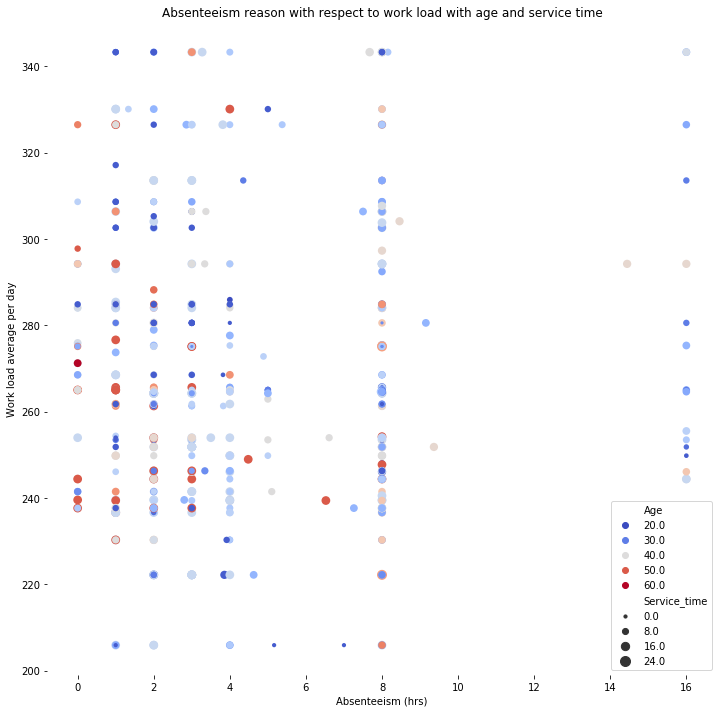

In [38]:
#Absenteeism visualization-
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
ax5 = sns.scatterplot(x="Absenteeism_time_in_hours", y="Work_load_Average_day_",
                hue="Age", size="Service_time",
                palette="coolwarm",
                sizes=(10, 100), linewidth=0,
                data=Employee_abs, ax=ax)
ax5.set_title("Absenteeism reason with respect to work load with age and service time")
ax5.set_ylabel("Work load average per day")
ax5.set_xlabel("Absenteeism (hrs)")
plt.savefig('Absenteeism_reason1.pdf')


# Outlier Analysis

In [34]:
#copy of data
df4= Employee_abs.copy()
#Employee_abs= df4.copy()


Transportation_expense


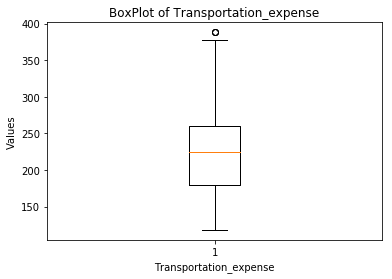

Distance_from_Residence_to_Work


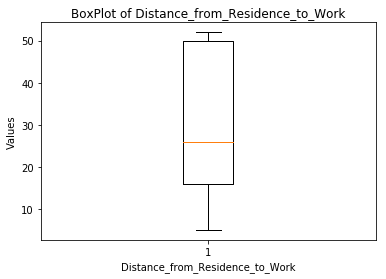

Service_time


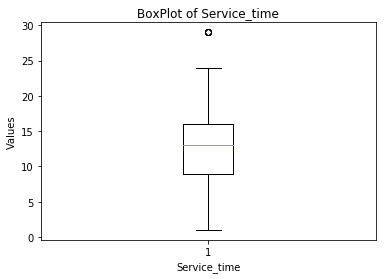

Age


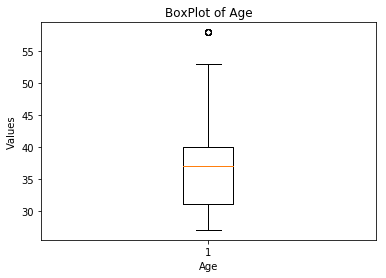

Work_load_Average_day_


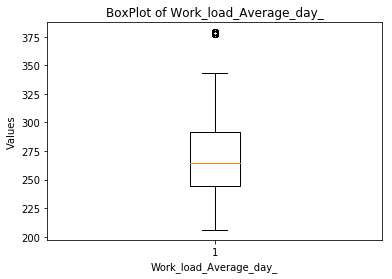

Hit_target


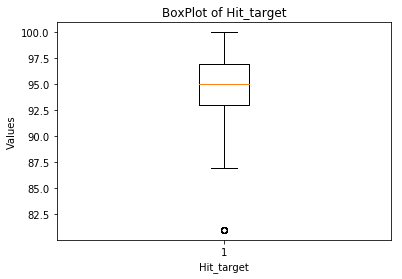

Weight


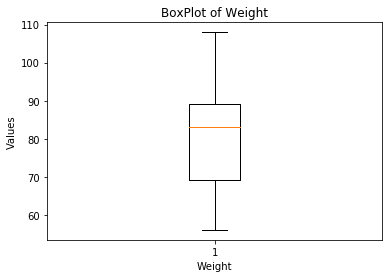

Height


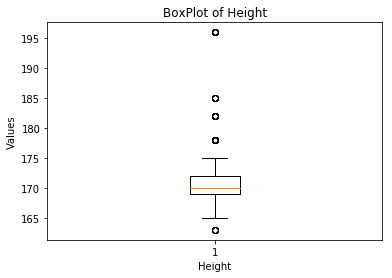

Body_mass_index


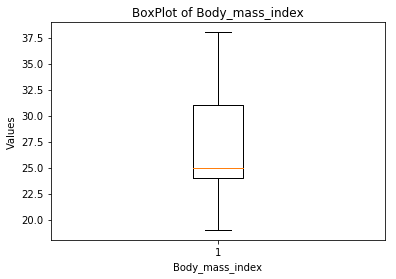

Absenteeism_time_in_hours


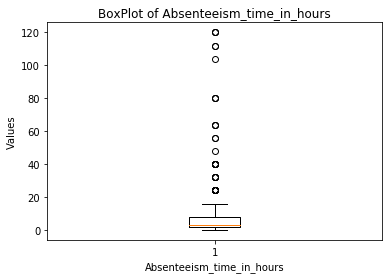

In [35]:
##Plot boxplot to visulazie outliers-
for i in cnames:
    print(i)
    plt.boxplot(Employee_abs[i])
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title("BoxPlot of "+i)
    plt.show()

In [36]:
##Calculate iqr, lower fence and upper fence-
for i in cnames:
    print(i)
    q75,q25= np.percentile(Employee_abs.loc[:,i],[75,25])
    iqr= q75-q25
    minimum= q25-(iqr*1.5)
    maximum= q75+(iqr*1.5)
    print(minimum)
    print(maximum)
    print(iqr)

#Replace outliers with NA-    
    Employee_abs.loc[Employee_abs[i]< minimum,i] = np.nan
    Employee_abs.loc[Employee_abs[i]> maximum,i] = np.nan

Transportation_expense
57.5
381.5
81.0
Distance_from_Residence_to_Work
-35.0
101.0
34.0
Service_time
-1.5
26.5
7.0
Age
17.5
53.5
9.0
Work_load_Average_day_
173.15350000000004
363.1094999999999
47.488999999999976
Hit_target
87.0
103.0
4.0
Weight
39.0
119.0
20.0
Height
164.5
176.5
3.0
Body_mass_index
13.5
41.5
7.0
Absenteeism_time_in_hours
-7.0
17.0
6.0


In [37]:
#Check NA in dataset-
Employee_abs.isnull().sum()

#Impute NA with KNN-

Employee_abs= pd.DataFrame(KNN(k=3).fit_transform(Employee_abs),columns=Employee_abs.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.206
Imputing row 101/718 with 0 missing, elapsed time: 0.209
Imputing row 201/718 with 1 missing, elapsed time: 0.210
Imputing row 301/718 with 0 missing, elapsed time: 0.212
Imputing row 401/718 with 0 missing, elapsed time: 0.214
Imputing row 501/718 with 0 missing, elapsed time: 0.214
Imputing row 601/718 with 2 missing, elapsed time: 0.215
Imputing row 701/718 with 0 missing, elapsed time: 0.217


In [39]:
Employee_abs.isnull().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

# Feature Selection

In [40]:
df5=Employee_abs.copy()

In [41]:
##Correlation analysis for numeric variables-

#extract only numeric variables in dataframe for correlation-
df_corr= Employee_abs.loc[:,cnames]

#Generate correlation matrix-
corr_matrix= df_corr.corr()

In [42]:
corr_matrix


,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day_,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Transportation_expense,1.000000,0.266958,-0.385905,-0.261316,-0.014446,-0.084023,-0.198486,-0.061471,-0.121693,0.192174
Distance_from_Residence_to_Work,0.266958,1.000000,0.121563,-0.095117,-0.081580,0.028050,-0.031946,-0.196778,0.131372,-0.004184
Service_time,-0.385905,0.121563,1.000000,0.646516,-0.063252,0.049683,0.423626,-0.056172,0.470263,-0.058076
Age,-0.261316,-0.095117,0.646516,1.000000,-0.054495,-0.020749,0.498177,-0.105833,0.552599,-0.083672
Work_load_Average_day_,-0.014446,-0.081580,-0.063252,-0.054495,1.000000,0.030202,-0.093550,-0.051592,-0.127169,0.050705
Hit_target,-0.084023,0.028050,0.049683,-0.020749,0.030202,1.000000,-0.019882,0.040081,-0.059491,0.029598
Weight,-0.198486,-0.031946,0.423626,0.498177,-0.093550,-0.019882,1.000000,0.149778,0.903644,-0.010765
Height,-0.061471,-0.196778,-0.056172,-0.105833,-0.051592,0.040081,0.149778,1.000000,-0.108530,0.043219
Body_mass_index,-0.121693,0.131372,0.470263,0.552599,-0.127169,-0.059491,0.903644,-0.108530,1.000000,-0.040237
Absenteeism_time_in_hours,0.192174,-0.004184,-0.058076,-0.083672,0.050705,0.029598,-0.010765,0.043219,-0.040237,1.000000


Text(0.5, 1.0, 'Correlation Plot')

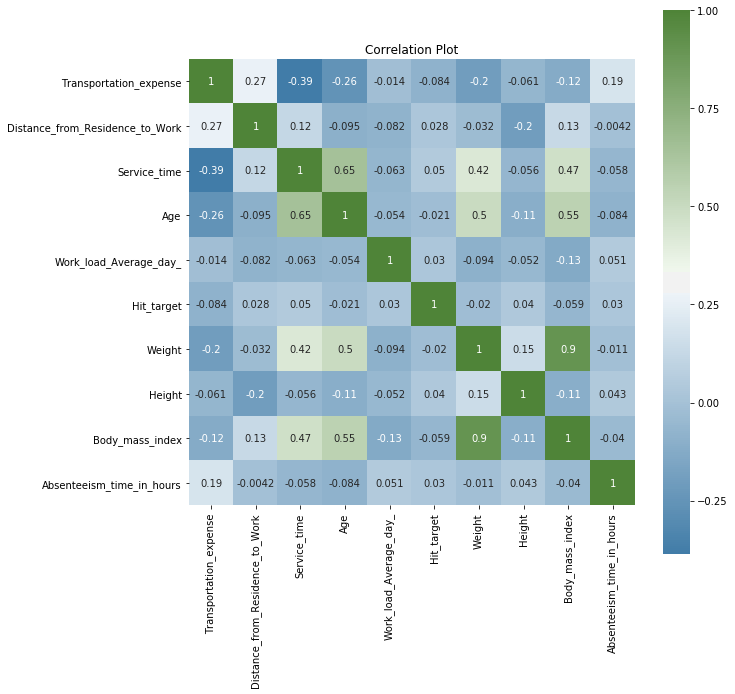

In [44]:
#Corrleation plot-

#Set height and width of page-
f,ax= plt.subplots(figsize=(10,10))

#Plot-
sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix,dtype=np.bool),cmap=sns.diverging_palette(240,120,as_cmap=True),
           square=True,ax=ax,annot=True)
plt.title("Correlation Plot")

In [45]:
#from above two figures we can see that Weight and Body mass index are higly correlated so will drop one variable
#now will check correlation in Categorical variables
import statsmodels.api as sm
from statsmodels.formula.api import ols

label = 'Absenteeism_time_in_hours'
for  i in cat_cnames:
    frame = label + ' ~ ' + i
    model = ols(frame,data=Employee_abs).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)

                         sum_sq     df          F    PR(>F)
Reason_for_absence   204.282325    1.0  17.915574  0.000026
Residual            8164.189531  716.0        NaN       NaN
                       sum_sq     df         F    PR(>F)
Month_of_absence     0.292084    1.0  0.024991  0.874433
Residual          8368.179772  716.0       NaN       NaN
                      sum_sq     df         F    PR(>F)
Day_of_the_week    54.172342    1.0  4.665143  0.031112
Residual         8314.299514  716.0       NaN       NaN
               sum_sq     df         F    PR(>F)
Seasons     29.539590    1.0  2.536337  0.111694
Residual  8338.932266  716.0       NaN       NaN
                           sum_sq     df          F        PR(>F)
Disciplinary_failure   668.371022    1.0  62.149011  1.188029e-14
Residual              7700.100834  716.0        NaN           NaN
                sum_sq     df         F    PR(>F)
Education     3.693486    1.0  0.316151  0.574106
Residual   8364.778370  716.0       

In [46]:
##Dimensionality reduction (Droping redundant variable) on behalf of 

Employee_abs = Employee_abs.drop(["Weight","Pet","Social_smoker","Education","Seasons","Month_of_absence"],axis=1)


In [47]:
Employee_abs.shape

(718, 14)

# Feature Scaling

In [48]:
df6=Employee_abs.copy()
#Employee_abs=df1.copy()

In [49]:
#updating continuous variables-
cnames= ['Transportation_expense', 'Distance_from_Residence_to_Work','Service_time', 'Age',
        'Work_load_Average_day_', 'Hit_target','Height', 'Body_mass_index',
       'Absenteeism_time_in_hours']

#updating categorical variables-
cat_cnames= ['Reason_for_absence','Day_of_the_week','Disciplinary_failure','Son', 'Social_drinker']


In [50]:
#Skewness of numeric variables-
for i in cnames:
    skewness = stats.describe(Employee_abs.loc[:,i])
    print("statistical properities of :"+str(i))
    print(skewness)
    print("*************************************************************")


statistical properities of :Transportation_expense
DescribeResult(nobs=718, minmax=(118.0, 378.0), mean=219.9677842947647, variance=4267.403673238506, skewness=0.3627667581574291, kurtosis=-0.33362280119869636)
*************************************************************
statistical properities of :Distance_from_Residence_to_Work
DescribeResult(nobs=718, minmax=(5.0, 52.0), mean=29.54874651572311, variance=218.28702076207122, skewness=0.3205003614151142, kurtosis=-1.238708485370826)
*************************************************************
statistical properities of :Service_time
DescribeResult(nobs=718, minmax=(1.0, 24.0), mean=12.473537606081669, variance=17.21756933851194, skewness=-0.33956117792159224, kurtosis=-0.17000453283733075)
*************************************************************
statistical properities of :Age
DescribeResult(nobs=718, minmax=(27.0, 53.0), mean=36.159532159681824, variance=37.208692540082055, skewness=0.482362503527695, kurtosis=-0.25572276239363

In [51]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
Employee_abs['Absenteeism_time_in_hours'] = np.log1p(Employee_abs['Absenteeism_time_in_hours'])

Transportation_expense


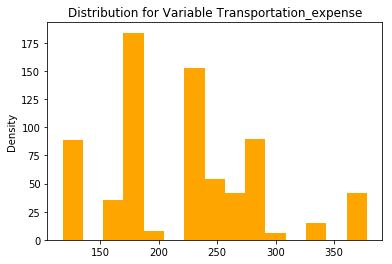

Distance_from_Residence_to_Work


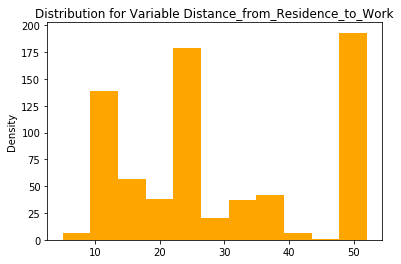

Service_time


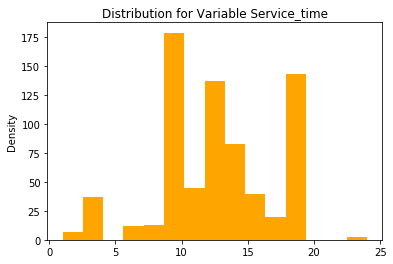

Age


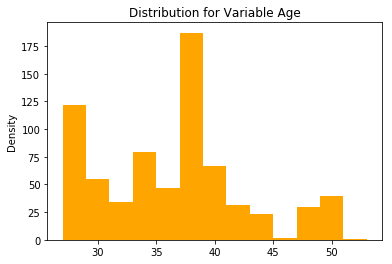

Work_load_Average_day_


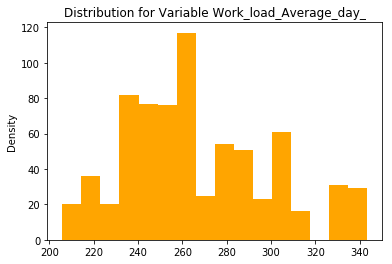

Hit_target


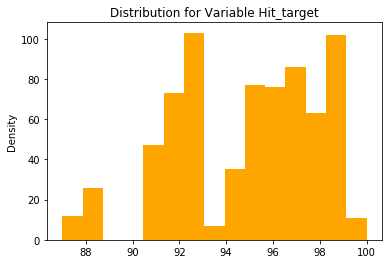

Height


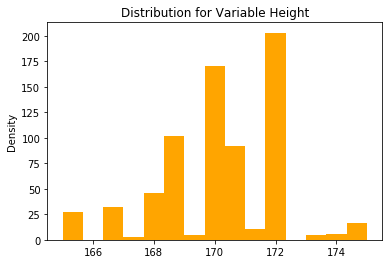

Body_mass_index


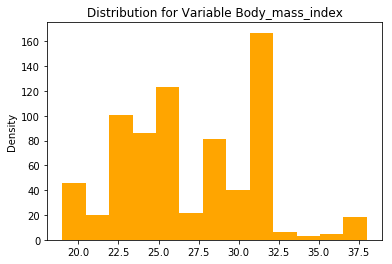

Absenteeism_time_in_hours


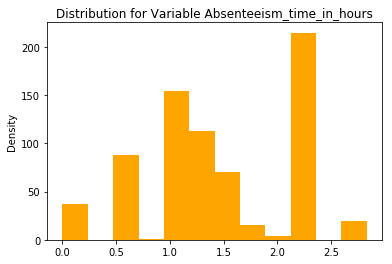

In [52]:
#Normality check
for i in cnames:
    print(i)
    %matplotlib inline  
    plt.hist(Employee_abs[i], bins='auto',color='orange')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show() 

 #From below plot its showing data is not uniformaly distributed, so we will do normalization for dataset.

In [53]:
#Since the data is not normally distributed we go for Normalization

#Normalization-
for i in cnames:
    if i== 'Absenteeism_time_in_hours':
        continue
    print(i)
    Employee_abs[i]= (Employee_abs[i]-min(Employee_abs[i]))/(max(Employee_abs[i])-min(Employee_abs[i]))
    print(Employee_abs[i])

Transportation_expense
0      0.657692
1      0.000000
2      0.234615
3      0.619231
4      0.657692
5      0.934615
6      0.546154
7      0.142308
8      0.450000
9      0.546154
10     0.546154
11     0.546154
12     0.234615
13     0.234615
14     0.234615
15     0.234615
16     0.273077
17     0.500000
18     0.234615
19     0.934615
20     0.546154
21     0.657692
22     0.934615
23     0.657692
24     0.150000
25     0.657692
26     0.234615
27     0.234615
28     0.450000
29     0.196767
         ...   
688    1.000000
689    0.000000
690    0.442308
691    0.234615
692    0.450000
693    0.576923
694    0.000000
695    0.234615
696    0.665385
697    0.234615
698    0.000000
699    0.442308
700    0.000000
701    0.000000
702    0.442308
703    0.450000
704    0.442308
705    0.423077
706    0.000000
707    0.423077
708    0.273077
709    0.000000
710    0.934615
711    0.411538
712    0.965385
713    0.657692
714    0.450000
715    0.000000
716    0.434615
717    0.234615
N

Transportation_expense


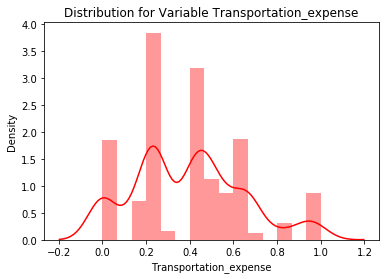

Distance_from_Residence_to_Work


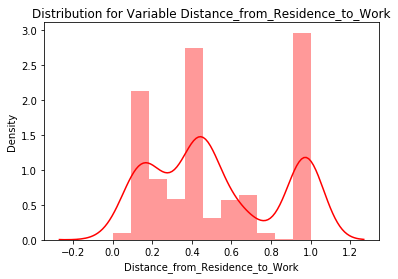

Service_time


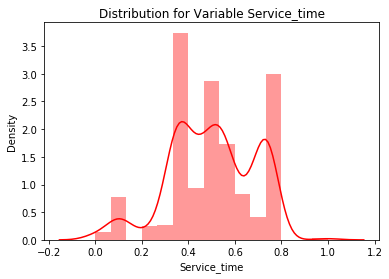

Age


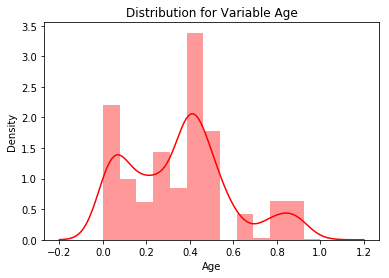

Work_load_Average_day_


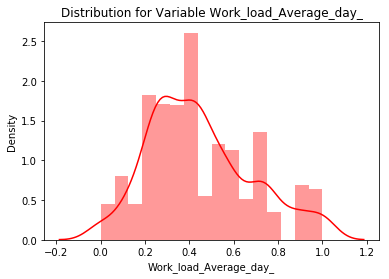

Hit_target


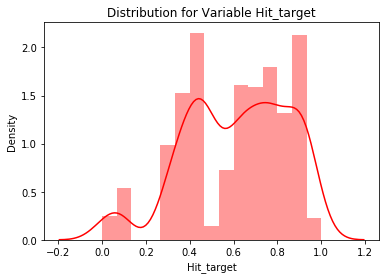

Height


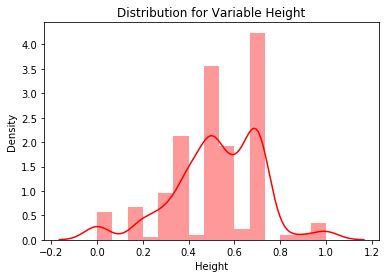

Body_mass_index


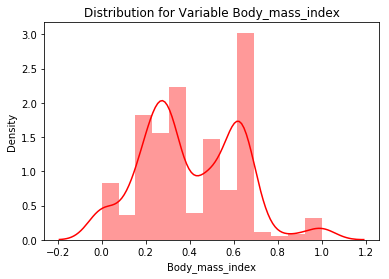

Absenteeism_time_in_hours


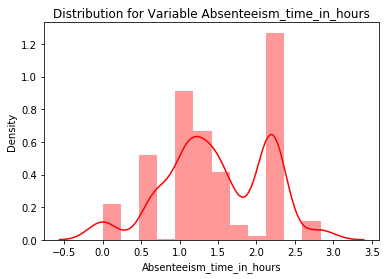

In [54]:
#probablility distribution of data after normalization-
for i in cnames:
    print(i)
    sns.distplot(Employee_abs[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [55]:
Employee_abs.describe()

,Reason_for_absence,Day_of_the_week,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day_,Hit_target,Disciplinary_failure,Son,Social_drinker,Height,Body_mass_index,Absenteeism_time_in_hours
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,19.409471,3.899721,0.392184,0.522314,0.498849,0.352290,0.446823,0.611342,0.045961,1.001393,0.565460,0.526303,0.405672,1.482805
std,8.279768,1.419519,0.251251,0.314352,0.180409,0.234611,0.235301,0.237132,0.209547,1.084311,0.496042,0.193889,0.225184,0.658182
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,0.234615,0.234043,0.347826,0.153846,0.280116,0.461538,0.000000,0.000000,0.000000,0.400000,0.263158,1.098612
50%,23.000000,4.000000,0.411538,0.446809,0.521739,0.384615,0.424739,0.615385,0.000000,1.000000,1.000000,0.500000,0.315789,1.386294
75%,26.000000,5.000000,0.546154,0.957447,0.652174,0.500000,0.574766,0.769231,0.000000,2.000000,1.000000,0.699999,0.631579,2.197225
max,28.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.833213


In [56]:
#write Normalized data into drive-
Employee_abs.to_csv("Absenteeism_Pre_processed.csv",index=False)

# Model Development 

In [57]:
df=Employee_abs.copy()
#Employee_abs=df.copy()

In [61]:
#Import libraries-
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [58]:
#Convert categorical to dummy variable-
Employee_abs = pd.get_dummies(Employee_abs,columns=cat_cnames)

#split data for predictor and target seperatly-
X= Employee_abs.drop(['Absenteeism_time_in_hours'],axis=1)
Y= Employee_abs['Absenteeism_time_in_hours']

#Divide data into train and test-
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.20,random_state=220192)


## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor

#Decision tree for regression-
DT_model= DecisionTreeRegressor().fit(X_train,Y_train)

#model prediction on train data-
DT_train= DT_model.predict(X_train)

#model prediction on test data-
DT_test= DT_model.predict(X_test)

#RMSE for train data-
RMSE_train=np.sqrt(mean_squared_error(Y_train,DT_train))

#RMSE for test data-
RMSE_test=np.sqrt(mean_squared_error(Y_test, DT_test))

#r2 value for train data-
r2_train= r2_score(Y_train,DT_train)

#r2 value for test data-
r2_test=r2_score(Y_test,DT_test)

print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.07884952020037742
Root Mean Square Rate for test data=0.5077699302714634
R^2_score for train data=0.985408233172478
R^2_score for test data=0.43752067187774235


## Random Forest

In [63]:
#import libraris-
from sklearn.ensemble import RandomForestRegressor

#Random Forest for regression-
RF_model= RandomForestRegressor(n_estimators=300).fit(X_train,Y_train)

#model prediction on train data-
RF_train= RF_model.predict(X_train)

#model prediction on test data-
RF_test= RF_model.predict(X_test)

#RMSE for train data-
RMSE_train=np.sqrt(mean_squared_error(Y_train, RF_train))

#RMSE for test data-
RMSE_test=np.sqrt(mean_squared_error(Y_test, RF_test))

#r2 value for train data-
r2_train= r2_score(Y_train,RF_train)

#r2 value for test data-
r2_test=r2_score(Y_test,RF_test)

print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.17911848885529394
Root Mean Square Rate for test data=0.38532052942800277
R^2_score for train data=0.9247007579960954
R^2_score for test data=0.6760955569232954


# Linear Regression

In [64]:
#import libraries-
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Linear Regression model for regression-
LR_model= sm.OLS(Y_train,X_train).fit()
print(LR_model.summary())

                                OLS Regression Results                               
Dep. Variable:     Absenteeism_time_in_hours   R-squared:                       0.588
Model:                                   OLS   Adj. R-squared:                  0.553
Method:                        Least Squares   F-statistic:                     16.73
Date:                       Thu, 06 Jun 2019   Prob (F-statistic):           3.41e-75
Time:                               19:21:25   Log-Likelihood:                -315.28
No. Observations:                        574   AIC:                             722.6
Df Residuals:                            528   BIC:                             922.8
Df Model:                                 45                                         
Covariance Type:                   nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [65]:
#model prediction on train data-
LR_train= LR_model.predict(X_train)

#model prediction on test data-
LR_test= LR_model.predict(X_test)

#RMSE for train data-
RMSE_train=np.sqrt(mean_squared_error(Y_train,LR_train))

#RMSE for test data-
RMSE_test=np.sqrt(mean_squared_error(Y_test,LR_test))

#r2 for train data-
r2_train=r2_score(Y_train,LR_train)

#r2 for test data-
r2_test=r2_score(Y_test,LR_test)

print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.41909287918327137
Root Mean Square Rate for test data=0.42009883150633176
R^2_score for train data=0.5877787890719897
R^2_score for test data=0.6149868563097234


## Gradient Boosting

In [66]:
#import libraries-
from sklearn.ensemble import GradientBoostingRegressor

#Gradient Boosting for regression-
GB_model = GradientBoostingRegressor().fit(X_train, Y_train)

#model prediction on train data-
GB_train= GB_model.predict(X_train)

#model prediction on test data-
GB_test= GB_model.predict(X_test)

#RMSE for train data-
RMSE_train=np.sqrt(mean_squared_error(Y_train,GB_train))

#RMSE for test data-
RMSE_test=np.sqrt(mean_squared_error(Y_test, GB_test))

#r2 value for train data-
r2_train= r2_score(Y_train,GB_train)

#r2 value for test data-
r2_test=r2_score(Y_test,GB_test)

print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.36021652302169055
Root Mean Square Rate for test data=0.3974748203880278
R^2_score for train data=0.6954651276654374
R^2_score for test data=0.6553392313385958


## 1. What changes company should bring to reduce the number of absenteeism?

# 
From the above (Data understanding) plots we can say that people with only a high school degree are absent more often. 
The reson frequently used is 1 in absenteeism hrs.which is code of Diseases.we can see that people with
no children or no pets tend to be absent more ofte than people who have children or pets. we can also 
see that the people who are social drinker tend to be absent more as comapre to non drinker.
Absenteeism through months and days of week and seasons are almost constant. 
People with disciplinary failure o have maximum absenteeism.
-->Employee who have work load between 240 to 300 minutes and age below 30 and serive time is below 8, these employee tend to absent more frequently

## 2. How much losses every month can we project in 2011 if same trend of absenteeism continues?

In [67]:
#Loading data to another dataframe
loss_month=df5.copy()

In [68]:
loss_month.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,172.0,31.0,0.0
2,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [69]:
#work loss per month
loss_month['work_loss_average_day'] = 0
for i  in range(len(loss_month)):
    loss_month['work_loss_average_day'].loc[i] = ((loss_month['Work_load_Average_day_'].loc[i])/24)*loss_month['Absenteeism_time_in_hours'].loc[i]

In [71]:
loss_month.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day_,Hit_target,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,work_loss_average_day
0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0,39.925667
1,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,97.0,...,1.0,1.0,1.0,0.0,0.0,98.0,172.0,31.0,0.0,0.000000
2,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,97.0,...,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0,19.962833
3,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,97.0,...,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0,39.925667
4,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0,19.962833


In [73]:
#total absenteeism per month-
Absenteeism_hours_monthly = loss_month.groupby('Month_of_absence').sum()

In [74]:
Absenteeism_hours_monthly= Absenteeism_hours_monthly[['Absenteeism_time_in_hours','work_loss_average_day']]

In [75]:
Monthly_loss= Absenteeism_hours_monthly.rename(columns={'Absenteeism_time_in_hours': 'Absenteeism time/month(hrs.)', 
                            'work_loss_average_day': 'Work loss per month'})

In [76]:
Monthly_loss

,Absenteeism time/month(hrs.),Work loss per month
Month_of_absence,,
1.0,171.685945,2258.468119
2.0,279.364511,3167.553023
3.0,443.587342,5202.503497
4.0,239.915715,2732.079510
5.0,259.744293,2651.602016
6.0,240.571077,2710.274163
7.0,370.688157,3914.799765
8.0,237.163987,2332.985366
9.0,186.884730,2118.879953
